# Funciones de muestreo

In [71]:
import pandas as pd
import numpy as np
import random

In [72]:
df = pd.read_csv('economia-y-turismo-en-el-centro-historico.csv')
df.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


## Muestreo aleatorio simple

In [73]:
aleat = df.sample(n=8) #con sample(8) elijo una muestra aleatoria de 8
aleat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
208,208,"19.423857491,-99.1225572301","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_108_11,Venustiano Carranza,B,Hotel,Juárez
21,21,"19.43614459,-99.13945267","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_098_01,Cuautémoc,A,Museo,Telégrafo
38,38,"19.4439555857,-99.1345196425","{""type"": ""Polygon"", ""coordinates"": [[[-99.1351...",004_106_01,Cuauhtémoc,B,Mercado,La Lagunilla Comestibles
100,100,"19.4337759404,-99.1378211234","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_014_06,Cuautémoc,A,Hotel,Ritz Ciudada de México
122,122,"19.4328655483,-99.1385210348","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_020_04,Cuautémoc,A,Hotel,Principal
229,229,"19.4346765421,-99.1318394918","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",005_145_14,Cuautémoc,A,Museo,Templo Mayor
215,215,"19.4383767258,-99.1331865203","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_082_16,Cuautémoc,A,Hotel,"La Fontelina , S.A. DE C.V."
103,103,"19.4370810464,-99.1361494106","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_091_27,Cuautémoc,A,Hotel,Cuba


In [74]:
prop_25 = df.sample(frac=.25) #Muestra aleatoria de tamaño del 25%
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
208,208,"19.423857491,-99.1225572301","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_108_11,Venustiano Carranza,B,Hotel,Juárez
150,150,"19.440448428,-99.1365429261","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_065_10,Cuautémoc,B,Hotel,Moderno
13,13,"19.43878785,-99.1490443182","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_147_02,Cuautémoc,B,Hotel,Monaco
157,157,"19.4272935771,-99.1227492994","{""type"": ""Polygon"", ""coordinates"": [[[-99.1230...",323_063_08,Venustiano Carranza,B,Mercado,Merced Comidas
125,125,"19.4342350395,-99.1354548065","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_007_06,Cuautémoc,A,Hotel,Zamora


## Muestreo sistemático

In [75]:
def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(df, 5)
systematic_sample.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
5,5,"19.4263287068,-99.1207277209","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_161_11,Venustiano Carranza,B,Hotel,Baño San Tiago
10,10,"19.4441424478,-99.14600807","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_048_10,Cuautémoc,B,Hotel,Moctezuma
15,15,"19.42413788,-99.1324515","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_153_11,Cuautémoc,B,Hotel,San Lucas
20,20,"19.4357307042,-99.1326583218","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_098_26,Cuautémoc,A,Museo,La Caricatura


## Muestreo Estratificado

In [76]:
df['estratificado'] = df['delegacion'] + ", " + df['tipo']
(df['estratificado'].value_counts()/len(df)).sort_values(ascending=False)

Cuautémoc, Hotel                0.643478
Cuautémoc, Museo                0.156522
Venustiano Carranza, Hotel      0.078261
Cuauhtémoc, Mercado             0.073913
Venustiano Carranza, Mercado    0.047826
Name: estratificado, dtype: float64

Si nuestros datos son diferentes y sabemos que la proporción es la siguiente:

Hoteles en Cuauhtémoc es de 0.5

Museos en Cuauhtémoc es de 0.2

Hoteles en Venuestiano Carranza es de 0.1

Mercados en Cuauhtémoc es de 0.1

Mercados en Venuestiano Carranza es de 0.1

In [77]:
def data_estratificada(df, name_column_estrat, values_estrat, prop_estrat, random_state=None):
    df_estrat = pd.DataFrame(columns= df.columns) # Creamos un data frame vacío con los nombres de las columnas de df principal

    pos = -1
    for i in range(len(values_estrat)): #iteramos sobre los valores estratificados
        pos+=1
        if pos == len(values_estrat) -1 :
            ratio_len = len(df) - len(df_estrat) # si es la iteración final calcula el número de valores de salida tenga el mismo número de filas que de entrada
        else:
            ratio_len = int(len(df) * prop_estrat[i]) # calcula el número de filas según la proporción deseada

        df_filtrado = df[df[name_column_estrat] == values_estrat[i]] # filtra los datos de origen según los valores seleccionados en la estratificación de datos
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state) # se hace un sample de los datos filtrados usando la ratio que hemos calculado
        df_estrat = pd.concat([df_estrat, df_temp]) # junta las tablas de sample con la estratificada para producir el resultado final

    return df_estrat # Return the stratified, re-sampled data

In [78]:
values_estrat = ['Cuautémoc, Hotel', 'Cuautémoc, Museo', 'Venustiano Carranza, Hotel', 'Cuauhtémoc, Mercado','Venustiano Carranza, Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1]
df_estrat = data_estratificada(df, 'estratificado', values_estrat, prop_estrat, random_state=42)
df_estrat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
164,164,"19.4388741511,-99.1413308257","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_113_03,Cuautémoc,B,Hotel,Dos Naciones,"Cuautémoc, Hotel"
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar,"Cuautémoc, Hotel"
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico,"Cuautémoc, Hotel"
168,168,"19.4349726565,-99.147766133","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_23,Cuautémoc,B,Hotel,One Alameda,"Cuautémoc, Hotel"
113,113,"19.43374405,-99.13550135","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_13,Cuautémoc,A,Hotel,San Antonio,"Cuautémoc, Hotel"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza, Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza, Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza, Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza, Mercado"


# Varianza y desviación estándar muestral

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

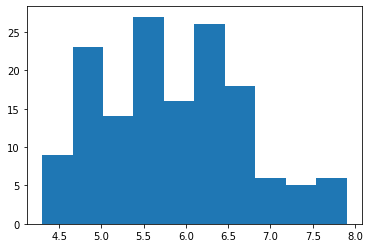

In [81]:
plt.hist(data= iris, x='sepal_length')

C:\Users\gnobl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

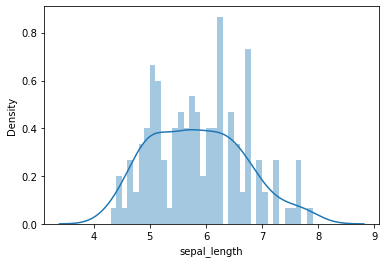

In [82]:
sns.distplot(iris['sepal_length'], hist=True, kde=True, bins=int(180/5))

## Calculo de la varianza

In [83]:
iris['sepal_length'].var()

0.6856935123042505

## Cálculo de la desviación estandar

In [84]:
iris['sepal_length'].std()

0.8280661279778629

## Cálculo de la media

In [85]:
iris['sepal_length'].mean()

5.843333333333335

Creamos una muestra mediante el muestreo aleatorio simple

In [86]:
muestra = iris.sample(frac=0.5)
muestra

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
45,4.8,3.0,1.4,0.3,setosa
73,6.1,2.8,4.7,1.2,versicolor
118,7.7,2.6,6.9,2.3,virginica
59,5.2,2.7,3.9,1.4,versicolor
...,...,...,...,...,...
93,5.0,2.3,3.3,1.0,versicolor
139,6.9,3.1,5.4,2.1,virginica
34,4.9,3.1,1.5,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica


## Calculo de varianza

In [87]:
muestra['sepal_length'].var()

0.7110378378378381

## Calculo de desviacion estandar

In [88]:
muestra['sepal_length'].std()

0.8432305958857507

## Cálculo de la media

In [89]:
muestra['sepal_length'].mean()

5.823999999999999

# Intervalos de confianza

In [90]:
import scipy.stats as st #Libreria para calcular metodos estadisticos

In [91]:
np.random.seed(20) 
var_1 = np.random.randint(0, 10, 10) # Días de vacaciones
var_2 = var_1+np.random.normal(0,1,10) #Dinero gastado (0 = no se gasta nada, 1 = se gasta todo)

## Visualizacion de resultados con un intervalo de confianza del 80%

C:\Users\gnobl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


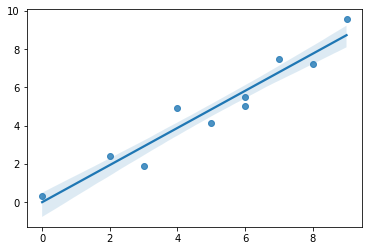

In [92]:
graf = sns.regplot(var_1,var_2, ci=80)

In [93]:
tuple = list(zip(var_1, var_2)) #unimos las dos variables en una tupla
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [94]:
tabla = pd.DataFrame(tuple, columns=['Dias_vacaciones', 'Dinero_gastado']) #Convertimos la tupla en una data frame
tabla

,Dias_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [95]:
#Intervalo de confiaza al 95%
st.t.interval(alpha=0.95, df=len(tabla),loc = np.mean(tabla),scale=st.sem(tabla))

C:\Users\gnobl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.03496624, 2.87784583]), array([6.96503376, 6.83035991]))

El primer array de resultados indica que la gente viajaria entre 2.8 a 3 dias El segundo array indica que gastaran entre el 68% y el 69% de su dinero

# Tipos de pruebas de hipotesis

In [96]:
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [97]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Distribucion t de student

In [98]:
se_length = iris.std()['sepal_length']/np.sqrt(10)
se_width = iris.std()['sepal_width']/np.sqrt(10)

C:\Users\gnobl\AppData\Local\Temp\ipykernel_11952\3445850388.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_length = iris.std()['sepal_length']/np.sqrt(10)
C:\Users\gnobl\AppData\Local\Temp\ipykernel_11952\3445850388.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width = iris.std()['sepal_width']/np.sqrt(10)


In [99]:
sed = np.sqrt((se_length**2)+ (se_width**2))

In [100]:
t_stat = (iris.mean()['sepal_length']- iris.mean()['sepal_width'])/sed
t_stat

C:\Users\gnobl\AppData\Local\Temp\ipykernel_11952\1478535287.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat = (iris.mean()['sepal_length']- iris.mean()['sepal_width'])/sed


9.414779428410267

In [101]:
p = ttest_ind(iris['sepal_length'],iris['sepal_width'])
p

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)

La conclusion es que el valor de t (9.414) es mayor que el valor critico ( el valor de p), estamos concluyendo que las distribuciones son diferentes, estamos rechazando la hipotesis nula, donde la teoria inicial era que las distribuciones de ambas eran similares, como no sucede, rechazamos la hipotesis nula, y nos vamos por la hipotesis alternativa que en este caso seria que las distribuciones son diferentes

Rechazamos la hipotesis nula porque el valor de t es muy superior al valor p. Si el valor t fuera menor al p-value se aceptaria la hipotesis nula

# Correlacion y coeficiente de Pearson

In [102]:
iris['sepal_length'].corr(iris['sepal_width'])
#Ese valor nos indica que la correlacion es muy debil o inexistente

-0.11756978413300202

In [103]:
st.pearsonr(iris['sepal_length'],iris['sepal_width'])
#No hay una correlacion entre las variables

(-0.11756978413300188, 0.15189826071144835)

# Analisis de la varianza ANOVA

In [104]:
f_oneway(iris['sepal_length'],iris['sepal_width'])
#El valor de p es menor al 0.5 de significancia, lo que nos indica que debemos rechazar la hipotesis nula de que ambas estan relacionadas

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

In [105]:
iris['sepal_length'].corr(iris['petal_width'])
#Estan altamente relacionadas

0.8179411262715756

In [106]:
st.pearsonr(iris['sepal_length'], iris['petal_width'])
#Hay correlacion entre variables

(0.8179411262715752, 2.3254980797935457e-37)

In [107]:
f_oneway(iris['sepal_length'],iris['petal_width'])

F_onewayResult(statistic=2553.888822404493, pvalue=3.4019773468158846e-148)

# Bootstrapping

In [108]:
#Creamos una tabla aletoria de datos
data = np.random.normal(loc= 34, size = 1000) #loc sera el promedio de edades, y size es el tamaño de la muestra
data

array([32.72049734, 34.24571517, 33.9558052 , 35.56763255, 35.05110868,
       34.40636843, 33.8313539 , 30.81029721, 35.12013226, 35.33277821,
       33.75666123, 33.86996929, 33.89098263, 35.55618644, 34.12877835,
       31.93305128, 33.11450685, 32.89542052, 34.93286635, 36.059838  ,
       33.06506204, 32.38700978, 34.52706972, 32.44889926, 34.32961334,
       32.86347346, 33.6615094 , 34.32097078, 33.39769198, 35.54472836,
       34.64703408, 34.59321721, 34.4380245 , 35.35778902, 35.20451128,
       35.35179619, 34.49343724, 31.29563475, 33.4448142 , 34.00150856,
       34.85709382, 35.48114365, 33.78033888, 35.50339816, 32.51761495,
       33.14383578, 33.17130723, 34.1140476 , 34.52772847, 34.15583822,
       35.3014294 , 33.00519809, 36.09466534, 34.35942899, 34.69100212,
       32.51428039, 34.09878861, 33.77167897, 33.14522451, 33.48685489,
       33.03778402, 33.51754909, 33.76053024, 34.45974423, 34.64643017,
       34.48740296, 34.03819247, 34.98948656, 34.14362263, 34.75

In [109]:
data.mean()

34.00290445079015

In [110]:
#Iniciamos bootstrapping para calcular el promedio de edades

promedio = []
for i in range(40): #creamos 40 muestras
    muestra = random.sample(data.tolist(), 5) #creamos grupos aleatorios de 5 
    prom = np.mean(muestra) #buscamos la media de la muestra
    promedio.append(prom)

In [111]:
np.mean(promedio)

33.94495150434272

# Validación cruzada

In [112]:
ds = pd.read_csv('cancerdata.csv')
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
ds.isnull().any()
#Con isnull busco si alguna columna tiene datos NaN, asi puedo corregir esos dato para no tener errores al hacer la validacion cruzada
#La ultima columna todos sus datos son NaN

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [114]:
X = ds.iloc[:, 2:32] #la ultima columna del data set es NaN por lo que no la cuento para la validacion cruzada

Y = ds.iloc[:,1] #Señalamos donde esta la variable categorica, es en la columna 1

In [115]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
Y.value_counts() #para ver la distrbucion entre maligno y benigno

B    357
M    212
Name: diagnosis, dtype: int64

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #libreria para diferenciar el modelo training y el de test

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.30, random_state=4) 
#Random state define el nivel de precision 

model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
resultado = model.score(test_X,test_Y) #Nos indica la precision del modelo en porcentaje
print(resultado)

0.9005847953216374


In [118]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(train_X, train_Y)
resultado = modelo.score(test_X, test_Y)
print(resultado)

0.935672514619883


In [119]:
#Validacion cruzada k fold
from sklearn.model_selection import KFold

model = DecisionTreeClassifier()
kfold_validacion =KFold(10) #10 observaciones que vamos a usar

In [120]:
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(model, X, Y, cv = kfold_validacion)
print(resultados) 
resultados.mean() #Muestra el promedio de presicion 

[0.9122807  0.9122807  0.85964912 0.96491228 0.9122807  0.96491228
 0.89473684 0.92982456 0.96491228 0.91071429]


0.9226503759398497

# Clases desbalanceadas

PASO 1: Vemos como se distribuyen las clases

In [121]:
ds.groupby("diagnosis").size()

diagnosis
B    357
M    212
dtype: int64

In [122]:
(ds.groupby("diagnosis").size()[0]/ds.shape[0])*100

62.741652021089635

In [123]:
(ds.groupby("diagnosis").size()[1]/ds.shape[0])*100

37.258347978910365

PASO 2: Determinamos el verdadero score

In [124]:
from sklearn.metrics import cohen_kappa_score

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
cohen = cohen_kappa_score(prediction, Y_test)
print("Verdadero resultado", np.round(cohen*100, 2), "%")

Verdadero resultado 77.02 %


PASO 3: Solucionamos el problema del desbalanceo usando la libreria imblearn. Con esta librería sobremuestreamos la clase con menor proporción y submuestreamos la clase con más proporción tratando de que tengan el mismo porcentaje de datos.

In [125]:
!pip install imbalanced-learn

In [126]:
from imblearn.combine import SMOTEENN

print(ds.groupby("diagnosis").size())
# Estrategia de submuestreo
sample = SMOTEENN(sampling_strategy = 0.95)
# Ajustar y aplicar la transformación
X_bal, Y_bal = sample.fit_resample(X, Y)
# Resultados
print(pd.DataFrame(Y_bal).groupby("diagnosis").size())

diagnosis
B    357
M    212
dtype: int64
diagnosis
B    320
M    294
dtype: int64


PASO 4: Hallamos el score con las nuevas bases de datos creadas, en este ejemplo son X_bal y Y_bal

In [127]:
(pd.DataFrame(Y_bal).groupby("diagnosis").size()[0]/Y_bal.shape[0])*100

52.11726384364821

In [128]:
(pd.DataFrame(Y_bal).groupby("diagnosis").size()[1]/Y_bal.shape[0])*100

47.88273615635179

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_bal,pd.DataFrame(Y_bal),test_size=0.3,random_state=4)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
cohen = cohen_kappa_score(prediction, Y_test)
print("Resultado usando imblearn", np.round(cohen*100, 2), "%")

Resultado usando imblearn 89.16 %


In [130]:
# Validación cruzada con las clases correctamente balanceadas

from sklearn.model_selection import cross_val_score

k_fold=KFold(10)

resultados = cross_val_score(model, X_bal, pd.DataFrame(Y_bal), cv=k_fold)

print(resultados)
print("="*20)
print(resultados.mean())

[0.9516129  0.96774194 0.96774194 0.96774194 0.98360656 0.98360656
 0.98360656 0.96721311 0.96721311 0.98360656]
0.9723691168693813
